In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\API_SH.ALC.PCAP.LI_DS2_en_csv_v2_5872483.csv')

In [3]:
data = data.drop(data.columns[1:4], axis=1).drop(data.columns[-1:], axis=1)

In [4]:
data.loc[data['Country Name'].isin(['France', 'Czechia', 'Estonia', 'United States', 'South Africa'])]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
54,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.21968,NaN,NaN,NaN,13.28805,NaN,NaN,NaN
71,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.05872,NaN,NaN,NaN,11.26302,NaN,NaN,NaN
77,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.72756,NaN,NaN,NaN,11.30123,NaN,NaN,NaN
251,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.48589,NaN,NaN,NaN,9.56731,NaN,NaN,NaN
263,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.88007,NaN,NaN,NaN,8.76621,NaN,NaN,NaN


In [5]:
melted_data = pd.melt(data.loc[data['Country Name'].isin(['France', 'Czechia', 'Estonia', 'United States', 'South Africa'])], id_vars=['Country Name'], var_name='Year', value_name='Alcohol consumption')

In [6]:
melted_data

,Country Name,Year,Alcohol consumption
0,Czechia,1960,NaN
1,Estonia,1960,NaN
2,France,1960,NaN
3,United States,1960,NaN
4,South Africa,1960,NaN
...,...,...,...
310,Czechia,2022,NaN
311,Estonia,2022,NaN
312,France,2022,NaN
313,United States,2022,NaN


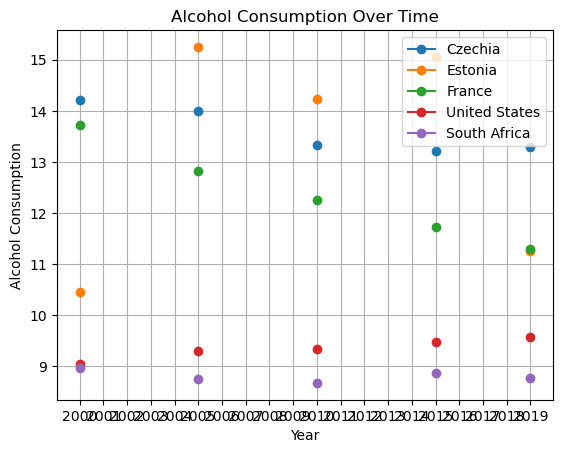

In [7]:
for country in melted_data['Country Name'].unique():
    temp_data = melted_data[melted_data['Country Name']==country]
    plt.plot(temp_data['Year'], temp_data['Alcohol consumption'],'-o', label=country)

plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
melted_no_nan = melted_data.dropna()

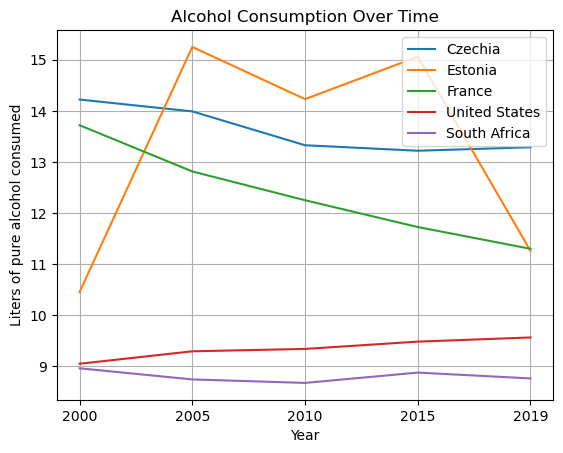

In [9]:
for country in melted_no_nan['Country Name'].unique():
    temp_data = melted_no_nan[melted_no_nan['Country Name']==country]
    plt.plot(temp_data['Year'], temp_data['Alcohol consumption'], label=country)
plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Liters of pure alcohol consumed')
plt.legend()
plt.grid(True)
plt.show()

## California

In [10]:
df_cali = pd.read_csv('data\AlcohBevABTPerCapCons.csv')

In [11]:
df_cali

,Fiscal Year From,Fiscal Year To,Population,Per Capita Beer Consumption (Gallons),Per Capita Wine Consumption (Gallons),Per Capita Distilled Spirits Consumption (Gallons)
0,2021,2022,39185605,17.96,4.07,1.96
1,2020,2021,39466855,17.82,3.65,1.81
2,2019,2020,39782870,16.97,3.66,1.54
3,2018,2019,39927315,16.90,3.83,1.59
4,2017,2018,39809693,17.49,3.66,1.54
...,...,...,...,...,...,...
62,1955,1956,13292000,14.52,2.05,1.58
63,1950,1951,10886000,15.38,1.96,1.84
64,1945,1946,9452000,16.86,2.13,2.37
65,1940,1941,7094000,10.71,2.51,1.60


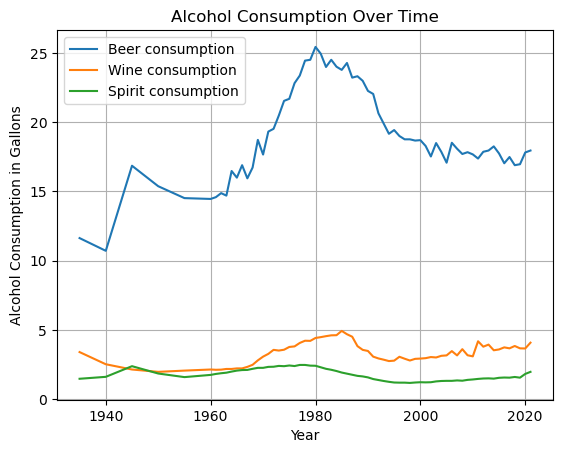

In [12]:
plt.plot(df_cali['Fiscal Year From'], df_cali['Per Capita Beer Consumption (Gallons)'], label='Beer consumption')
plt.plot(df_cali['Fiscal Year From'], df_cali['Per Capita Wine Consumption (Gallons)'], label='Wine consumption')
plt.plot(df_cali['Fiscal Year From'], df_cali['Per Capita Distilled Spirits Consumption (Gallons)'], label='Spirit consumption')
plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption in Gallons')
plt.legend()
plt.grid(True)
plt.show()

Alcohol percentage source:
https://alcohol.org/statistics-information/abv/

In [13]:
df_cali['Alcohol consumption'] = (df_cali['Per Capita Beer Consumption (Gallons)']*0.05 + df_cali['Per Capita Wine Consumption (Gallons)']*0.12 + df_cali['Per Capita Distilled Spirits Consumption (Gallons)']*0.4)*3.78541

In [14]:
df_cali

,Fiscal Year From,Fiscal Year To,Population,Per Capita Beer Consumption (Gallons),Per Capita Wine Consumption (Gallons),Per Capita Distilled Spirits Consumption (Gallons),Alcohol consumption
0,2021,2022,39185605,17.96,4.07,1.96,8.215854
1,2020,2021,39466855,17.82,3.65,1.81,7.771447
2,2019,2020,39782870,16.97,3.66,1.54,7.206285
3,2018,2019,39927315,16.90,3.83,1.59,7.345967
4,2017,2018,39809693,17.49,3.66,1.54,7.304706
...,...,...,...,...,...,...,...
62,1955,1956,13292000,14.52,2.05,1.58,6.071798
63,1950,1951,10886000,15.38,1.96,1.84,6.587370
64,1945,1946,9452000,16.86,2.13,2.37,7.747220
65,1940,1941,7094000,10.71,2.51,1.60,5.589915


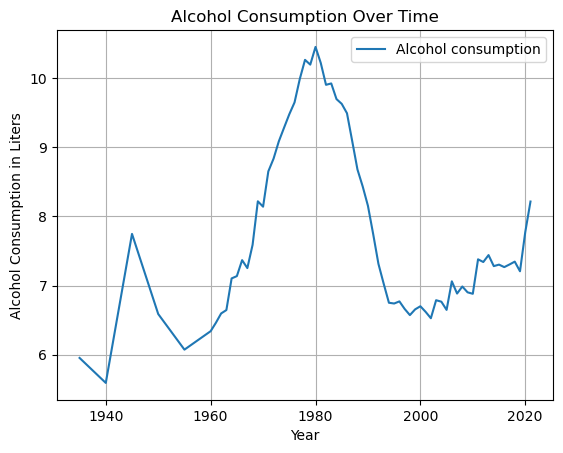

In [15]:
plt.plot(df_cali['Fiscal Year From'], df_cali['Alcohol consumption'], label='Alcohol consumption')
plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption in Liters')
plt.legend()
plt.grid(True)
plt.show()

### Add California data to world data

In [16]:
df_cali.columns = ['Year', 'Fiscal Year To', 'Population',
       'Per Capita Beer Consumption (Gallons)',
       'Per Capita Wine Consumption (Gallons)',
       'Per Capita Distilled Spirits Consumption (Gallons)',
       'Alcohol consumption']
df_cali['Country Name'] = 'California'

In [41]:
df_alcohol = pd.concat([melted_no_nan, df_cali[['Year', 'Country Name', 'Alcohol consumption']]]).reset_index()
df_alcohol['Year'] = df_alcohol['Year'].astype(int)

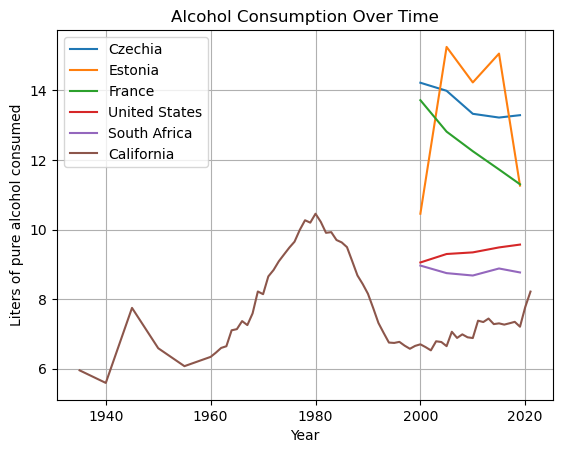

In [42]:
for country in df_alcohol['Country Name'].unique():
    temp_data = df_alcohol[df_alcohol['Country Name']==country]
    plt.plot(temp_data['Year'], temp_data['Alcohol consumption'], label=country)
plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Liters of pure alcohol consumed')
plt.legend()
plt.grid(True)
plt.show()

## GDP Data

In [ ]:
df_gdp = pd.read_excel('data\Data alcohol consumption.xlsx')

In [ ]:
df_gdp

,Year,Country,Consumption in Liter per capita,GDP per capita (current $),Schizophrenia disorders (share of population in %),Depressive disorder (share of population in %),Anxiety disorder (share of population in %),Bipolar disorder (share of population in %),Eating disorder (share of population in %)
0,2000,Czech Republic,11.8,6028.582612,0.293996,3.107828,3.198786,0.547842,0.164654
1,2001,Czech Republic,11.8,6637.106512,0.294182,3.087939,3.197180,0.547798,0.165724
2,2002,Czech Republic,11.9,8060.888811,0.294413,3.068506,3.195478,0.547755,0.166927
3,2003,Czech Republic,12.1,9818.568493,0.294650,3.051328,3.193819,0.547713,0.168955
4,2004,Czech Republic,11.5,11749.875524,0.294855,3.034337,3.192258,0.547673,0.170946
...,...,...,...,...,...,...,...,...,...
81,2015,South Africa,7.2,6204.929901,0.224708,4.230040,3.797369,0.556989,0.163241
82,2016,South Africa,7.3,5735.066787,0.224845,4.294334,3.802318,0.556990,0.164509
83,2017,South Africa,7.3,6734.475153,0.224997,4.346767,3.806037,0.556993,0.165450
84,2018,South Africa,7.2,7048.508112,0.224965,4.335893,3.799989,0.556994,0.165294


## Unemployment data

In [ ]:
df_unemployment = pd.read_csv(r'data\unemployment_data2.csv', encoding='iso-8859-1')

In [ ]:
df_unemployment

,ï»¿LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HUR,TOT,PC_LF,A,1967,1.875000,NaN
1,AUS,HUR,TOT,PC_LF,A,1968,1.850000,NaN
2,AUS,HUR,TOT,PC_LF,A,1969,1.800000,NaN
3,AUS,HUR,TOT,PC_LF,A,1970,1.625000,NaN
4,AUS,HUR,TOT,PC_LF,A,1971,1.925000,NaN
...,...,...,...,...,...,...,...,...
1399,CRI,HUR,TOT,PC_LF,A,2017,9.071724,NaN
1400,CRI,HUR,TOT,PC_LF,A,2018,10.264050,NaN
1401,CRI,HUR,TOT,PC_LF,A,2019,11.755390,NaN
1402,CRI,HUR,TOT,PC_LF,A,2020,19.606880,NaN


In [ ]:
df_unemployment_cali = pd.read_csv('data\Local_Area_Unemployment_Statistics__LAUS_.csv')

C:\Users\Sten\AppData\Local\Temp\ipykernel_7936\2343879862.py:1: DtypeWarning: Columns (1,2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unemployment_cali = pd.read_csv('data\Local_Area_Unemployment_Statistics__LAUS_.csv')


In [ ]:
df_unemployment_cali[df_unemployment_cali['Area Name ']=='California']

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,State,California,01/01/1976,1976.0,January,N,Final,9672362.0,8668016.0,1004346.0,0.104
1,State,California,01/01/1976,1976.0,January,Y,Final,9774280.0,8875685.0,898595.0,0.092
6,State,California,01/01/1977,1977.0,January,N,Final,10071966.0,9074522.0,997444.0,0.099
7,State,California,01/01/1977,1977.0,January,Y,Final,10137699.0,9204162.0,933537.0,0.092
12,State,California,01/01/1978,1978.0,January,N,Final,10613102.0,9737384.0,875718.0,0.083
...,...,...,...,...,...,...,...,...,...,...,...
187551,State,California,12/01/2020,2020.0,December,N,Final,18658500.0,16997800.0,1660600.0,0.089
187552,State,California,12/01/2020,2020.0,December,Y,Final,18735500.0,17039900.0,1695600.0,0.091
188574,State,California,12/01/2021,2021.0,December,N,Final,19073400.0,18119700.0,953700.0,0.050
188575,State,California,12/01/2021,2021.0,December,Y,Final,19143700.0,18095700.0,1047900.0,0.055
